In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
concatenated_df = pd.read_csv('C:/Users/MSI KATANA/Desktop/practice ML/data engineering cw by inupa B/Data-Engineering-HCHO-gas-prediction-/concatenated_data.csv')
concatenated_df

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000263,Nuwara Eliya,2019-01-01,2019-01-02
3,0.000263,Colombo,2019-01-02,2019-01-03
4,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
...,...,...,...,...
12777,0.000158,Kurunegala,2023-12-30,2023-12-31
12778,0.000117,Jaffna,2023-12-30,2023-12-31
12779,0.000117,"Bibile, Monaragala",2023-12-31,2024-01-01
12780,0.000065,Kurunegala,2023-12-31,2024-01-01


In [46]:
df_new = pd.read_csv('C:/Users/MSI KATANA/Desktop/practice ML/data engineering cw by inupa B/Data-Engineering-HCHO-gas-prediction-/new_df_advanced.csv')
df_new 

,HCHO Reading,Location,Current Date,Next Date,Year,Month,temperature_2m_mean,apparent_temperature_mean,windspeed_10m_max,et0_fao_evapotranspiration,elevation,precipitation_hours,shortwave_radiation_sum,rain_sum
0,0.000197,Colombo,2019-01-01,2019-01-02,2019,1,26.1,28.7,14.4,4.58,16.0,0.0,19.77,0.0
1,0.000263,Colombo,2019-01-02,2019-01-03,2019,1,25.7,27.3,16.6,5.19,16.0,0.0,21.45,0.0
2,0.000099,Colombo,2019-01-03,2019-01-04,2019,1,26.1,27.8,16.0,5.21,16.0,0.0,21.68,0.0
3,0.000210,Colombo,2019-01-04,2019-01-05,2019,1,26.0,27.6,16.9,5.22,16.0,0.0,22.95,0.0
4,0.000179,Colombo,2019-01-05,2019-01-06,2019,1,26.4,28.9,16.8,5.01,16.0,0.0,21.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,0.000214,Jaffna,2023-06-15,2023-06-16,2023,6,30.4,33.9,29.3,6.28,5.0,0.0,24.76,0.0
6512,0.000106,Kurunegala,2023-06-16,2023-06-17,2023,6,27.1,30.7,21.3,4.35,124.0,15.0,20.22,1.9
6513,0.000170,Jaffna,2023-06-16,2023-06-17,2023,6,30.7,34.8,30.8,6.12,5.0,0.0,23.96,0.0
6514,0.000306,Kurunegala,2023-06-17,2023-06-18,2023,6,26.4,29.8,20.0,3.42,124.0,19.0,14.99,5.5


# Using seasonal data and external Factors

In [56]:
# Assuming 'feature_name' is the name of the feature/column for which you want to get unique values
unique_values = df_new['Location'].unique()
print(unique_values)


['Colombo' 'Kandy' 'Kurunegala' 'Jaffna']


# Colombo

C:\Users\MSI KATANA\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 9.331274334196985e-05


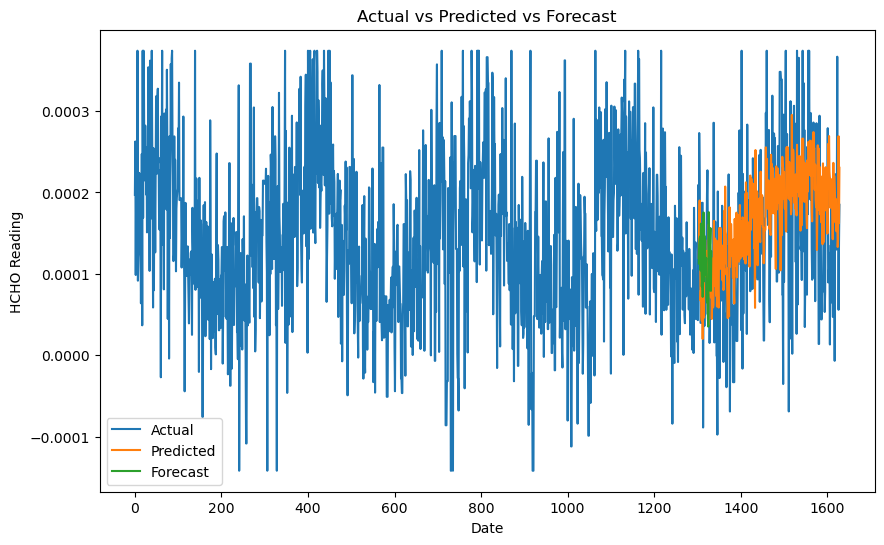

In [47]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Train-Test Split with 80:20 ratio
train_data, test_data = train_test_split(df_new[df_new['Location'] == 'Colombo'], test_size=0.2, shuffle=False)

# Step 3: Model Training
# Assuming you have multiple external factors like 'temperature_2m_mean', 'apparent_temperature_mean', 'windspeed_10m_max', etc.
exog_train = train_data[['temperature_2m_mean', 'apparent_temperature_mean', 'windspeed_10m_max', 'et0_fao_evapotranspiration', 'elevation', 'precipitation_hours' , 'shortwave_radiation_sum' , 'rain_sum']]
exog_test = test_data[['temperature_2m_mean', 'apparent_temperature_mean', 'windspeed_10m_max', 'et0_fao_evapotranspiration', 'elevation', 'precipitation_hours' , 'shortwave_radiation_sum' , 'rain_sum']]
model = SARIMAX(train_data['HCHO Reading'], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Step 4: Model Evaluation
predictions = result.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)
mse = mean_squared_error(test_data['HCHO Reading'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 5: Prediction
# Assuming you want to predict 30 steps ahead
future_exog = df_new[df_new['Location'] == 'Colombo'][exog_vars][-future_steps:]
forecast = result.get_forecast(steps=future_steps, exog=future_exog)
forecast_values = forecast.predicted_mean


# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.plot(df_new[df_new['Location'] == 'Colombo']['HCHO Reading'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.plot(forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted vs Forecast')
plt.legend()
plt.show()